In [6]:
from helper import (load_data, token, DanishCleaner,time_me,
                    show_diagram, show_most_informative_features)

In [2]:
## Long process timing that %time does not work
from datetime import datetime
import humanfriendly


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('fivethirtyeight') # plt.style.available

In [8]:
from sklearn.externals import joblib
from sklearn.model_selection import (train_test_split, cross_val_score)
from sklearn.feature_extraction.text import (CountVectorizer, TfidfVectorizer)

#### TfidfVectorizer == CountVectorizer + TfidfTransformer

In [2]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.linear_model import LogisticRegression

In [9]:
stops = joblib.load('../stops.pkl')

Loading data ...
Droping 10 rows with features lenght of less than 2
Droping 3 as rating and setting 1-2 as negative(0), 4-5 as positive(1))
{1: 460527, 0: 127232} 

Down sampling positive ratings to match negatives
Data loading completed
{1: 127232, 0: 127232} 

Execution Time: 4 seconds


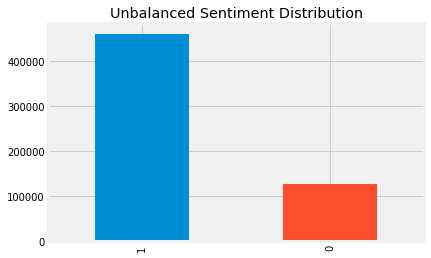

In [10]:
df = load_data('../sentiment_data', balanced=True)

In [11]:
df = df.sample(5000)

In [12]:
 X_train, X_test, y_train, y_test = train_test_split(df['features'], df['y'],
                                                    test_size=.2, random_state=7,stratify=df['y'])

In [13]:
print(f'Traing Size: {X_train.shape[0]}\nTest Size: {X_test.shape[0]:>8}')

Traing Size: 4000
Test Size:     1000


In [14]:
print(f'Traing Size\n\tPositive||Negative Sample\n\t  {y_train[y_train==1].shape[0]}||{y_train[y_train==0].shape[0]}')

Traing Size
	Positive||Negative Sample
	  1976||2024


In [15]:
print(f'Test Size\n\tPositive||Negative Sample\n\t  {y_test[y_test==1].shape[0]}||{y_test[y_test==0].shape[0]}')

Test Size
	Positive||Negative Sample
	  494||506


In [21]:
count_para = dict(ngram_range=(2, 3),tokenizer=token,
                     lowercase=True,stop_words=stops,min_df=10)
tfidf_para = dict(ngram_range=(1, 2), lowercase=True,max_df=.8,
                  min_df=10, sublinear_tf=True)

lda_para = dict(n_components=2, max_iter=50, learning_method='online', verbose=1,
                learning_offset=50.,doc_topic_prior=.1, topic_word_prior=.01,random_state=7)

logit_para = dict(C=1., penalty='l2', random_state=7,warm_start=True, 
                  verbose=1, solver='saga', n_jobs=4)  #n_jobs=-1 does not have any effect when solver is liblinear l2



In [4]:
model = Pipeline ([
    ('text_union', FeatureUnion([
                        ('lda_pipe', Pipeline([
                            ('countvec', CountVectorizer(**count_para)),
                            ('fe_se', SelectKBest(chi2, k=5000)),
                            ('lda',LatentDirichletAllocation(**lda_para))
                                            ])),
                        ('tfidf_pipe', Pipeline([
                                            ('tfidf', TfidfVectorizer(**tfidf_para)),
                                            ('fe_se', SelectKBest(chi2, k=5000))
                                                            ])),
                                        
                                                ])
                    ),
    ('clf', LogisticRegression(**logit_para))
    
])

NameError: name 'Pipeline' is not defined

In [3]:
print('Model training ...')
u = datetime.now()
model.fit(X_train, y_train)
v = datetime.now()

Model training ...


NameError: name 'model' is not defined

In [ ]:
delta = v-u
print('Training took: {}'.format(
            humanfriendly.format_timespan(delta.seconds)))

In [18]:
show_diagram(model,X_train, y_train, X_test, y_test)

Classification Report
	 _____________________________________________
             precision    recall  f1-score   support

   Negative       0.94      0.96      0.95     12723
   Positive       0.96      0.94      0.95     12724

avg / total       0.95      0.95      0.95     25447

	 _____________________________________________ 




NameError: name 'plt' is not defined

In [ ]:
dir(model.steps[0][1])

In [ ]:
dir(model.steps[0][1].transformer_list[0][1].steps[0][1])

In [ ]:
model.steps[0][1].transformer_list[0][1].steps[0][1].get_feature_names()

In [ ]:
feature_names = model.steps[0][1].transformer_list[0][1].steps[0][1].get_feature_names()
clf = model.steps[1][1]

In [ ]:
show_most_informative_features(clf=clf,feature_names=feature_names, n=100)

In [ ]:
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features
                                 ,stop_words=stop_words_
                                  )

In [ ]:
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)

nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)

In [ ]:
lr_clf  = Pipeline(memory=None,
         steps=[
        ('vec',  CountVectorizer(ngram_range=(1, 3), max_features=100000)),
        ('fe_se', SelectKBest(chi2, k=50000)),
        ('tfidf', TfidfTransformer()),
        ('clf', LogisticRegressionCV(n_jobs=-1,verbose=1))
         ])

pe_clf  = Pipeline(memory=None,
         steps=[
        ('tfid',  TfidfVectorizer(ngram_range=(1, 2), max_features=100000)),
        ('fe_se', SelectKBest(chi2, k=50000)),
        ('tfidf', TfidfTransformer()),
        ('clf', Perceptron(n_jobs=-1,verbose=1))
         ])

In [ ]:
print(metrics.classification_report(y_test, lr_clf.predict(X_test),target_names=['Negative','Positive']))

In [ ]:
>>> from sklearn.feature_extraction.text import HashingVectorizer
>>> from sklearn.linear_model import SGDClassifier
>>> vect = HashingVectorizer(decode_error='ignore',
... n_features=2**21,
... preprocessor=None,
... tokenizer=tokenizer)
>>> clf = SGDClassifier(loss='log', random_state=1, n_iter=1)

In [ ]:
clf = clf.partial_fit(X_test, y_test)